# Data Storytelling on Black Friday Dataset

## Steps on Data Storytelling

### Picking up a Dataset

Kaggle is a very good place to find numerous datasets. I chose the Black Friday Dataset. 
URL: https://www.kaggle.com/mehdidag/black-friday

In [15]:
#Importing the necessary libaries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
#Acquiring the pickled data and also getting some isights of the dataset.

import pickle
pickle_in = open('dw_bf.pickle','rb')
df = pickle.load(pickle_in)
pickle_in.close()


In [17]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [18]:
#To find the count of distinct values in the dataset. 
#df.apply(pd.Series.nunique)
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

#### We can see from the above data that all the columns except 'Purchase' column are categorical values and the 'Purchase' column would be considered as non-categorical. 

#### Looking at the data columns, we could begin to think what are the questions that could be answered.

### Analyzing data for research - 
#### Q) Who is more likely to spend more in a black Friday sale?
    1) Men or Women.
    2) Married or Un-Married
    3) Old Residents or new residents/visitors
#### Q) Which type of products are more likely to be sold in a sale like black Friday?
#### Q) Which type of products are common among men and which among women?
#### Prediction/classification -
    1) Predict Age of a customer based on the rest of available data.
    2) Predict gender of a customer based on rest of data.
    3) Predict amount of purchase based on rest of data.
#### Recommendation -
    1) Suggest products based on age.
    2) Suggest products based on location customers belong to.
    3) Suggest products based on gender.
    
#### The answers to the above questions can be found using some plots.

Text(0.5, 1.0, 'Transactions made by gender')

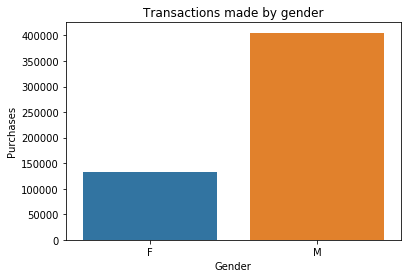

In [19]:
# Plotting a countplot of 'Gender' column
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Purchases')
plt.title("Transactions made by gender")

#### Looking at above count plot, it looks like a very smaller number of females attended the Black Friday sale. But it could also mean a few number of females paid for the products and may be their spouse paid for them.

Text(0.5, 1.0, 'Purchases made by age')

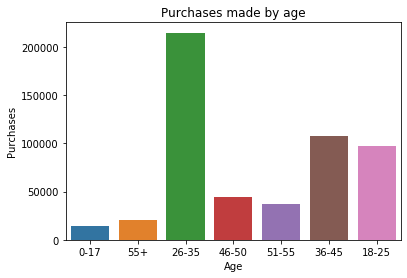

In [20]:
# Plotting a countplot of 'Age' column
sns.countplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Purchases made by age')

#### From the above count plot for age, it seems like the majority of the population ranging from the age 26-35 attended the sale.

#### Further, we could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males shopped in the sale than the females.

Text(0.5, 1.0, 'Money spent by Male/Female')

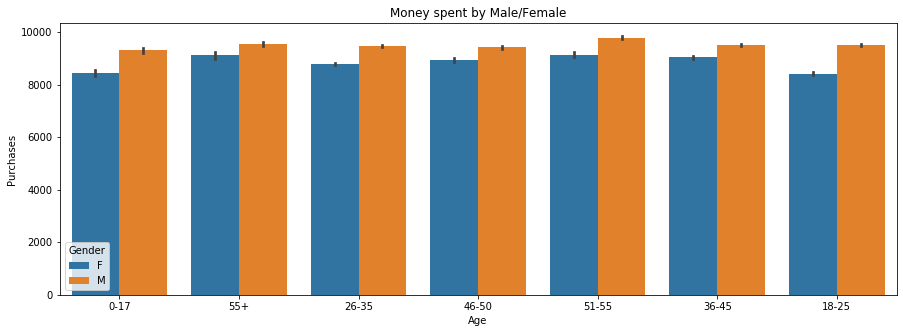

In [21]:
# Plotting the bar plot of 'Age' column with specifying the 'hue'.
#sns.countplot(df['Age'], hue=df['Gender'])
plt.figure(figsize=(15,5))
sns.barplot(x="Age", y="Purchase", hue="Gender", data = df)
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Money spent by Male/Female')

#### We could check further, how many of the males from the age range 26-35 were married? 
#### For this let’s create a column called 'Combined_G_M' that represents ‘Gender’ concatenated with ‘Married_Status’ column and then use it as hue.

In [22]:
#Creating a new column 'Combined_G_M'

df['Combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']), axis=1)
print(df['Combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


Text(0.5, 1.0, 'Transactions made by single vs married people')

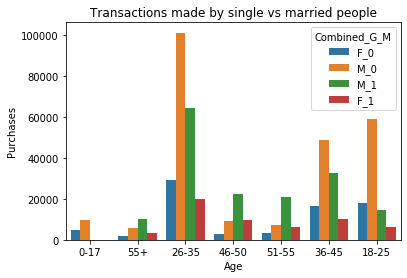

In [23]:
#Using the newly created column as hue to plot a count plot

sns.countplot(df['Age'],hue=df['Combined_G_M'])
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Transactions made by single vs married people')

#### As we see above, there are no bars for married status in the 0-17 age range which makes sense. And then if we look at the 46 and above age groups, unmarried females are very less. But on the other hand, married males paying in the age range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

Text(0.5, 1.0, 'Transactions for Product Category 2')

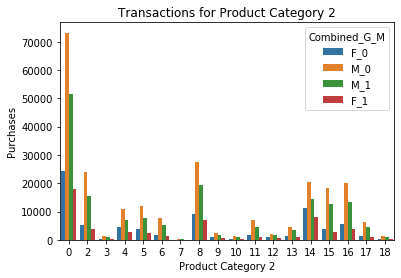

In [24]:
# Plotting the columns 'Product_Category_2' with hue.
sns.countplot(df['Product_Category_2'],hue=df['Combined_G_M'])
plt.xlabel('Product Category 2')
plt.ylabel('Purchases')
plt.title('Transactions for Product Category 2')

Text(0.5, 1.0, 'Transactions for Product Category 3')

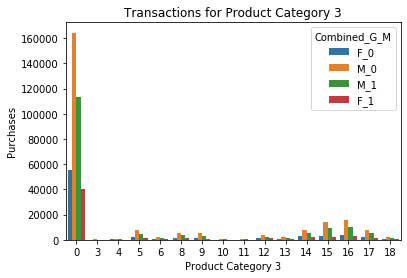

In [25]:
# Plotting the columns 'Product_Category_3' with hue.
sns.countplot(df['Product_Category_3'],hue=df['Combined_G_M'])
plt.xlabel('Product Category 3')
plt.ylabel('Purchases')
plt.title('Transactions for Product Category 3')

#### The above plots show that in both the Product Category 2 and 3, Product - 0 has been purchased the most by all people and unmarried males have the highest number of purchases in both the categories.

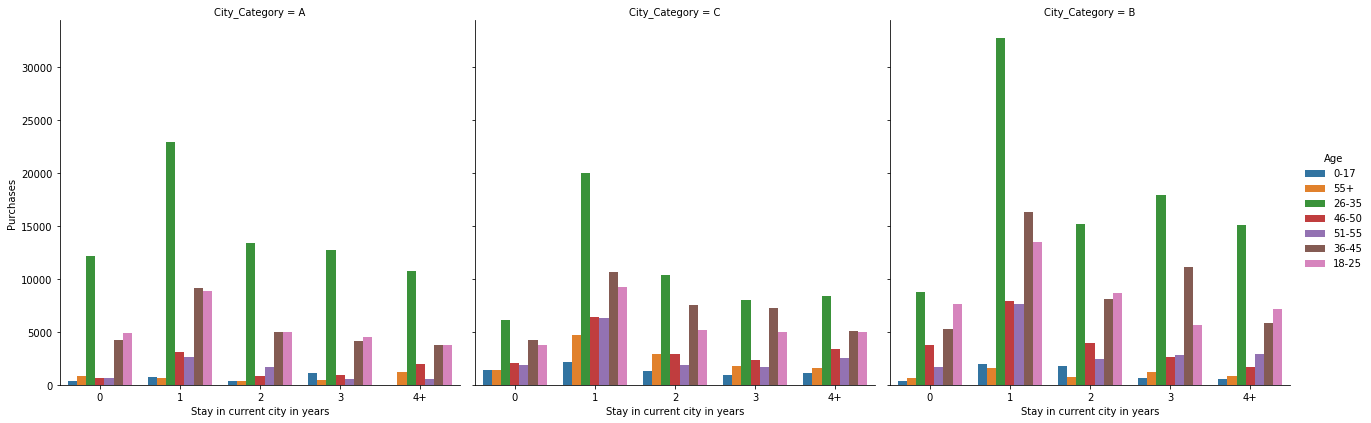

In [26]:
#Plotting a catplot to get more insights on the data.
g = sns.catplot(x='Stay_In_Current_City_Years', hue='Age', col='City_Category', 
            order = ['0','1','2', '3', '4+'], data=df, kind="count" ,height=6, aspect=1)
g.set_axis_labels('Stay in current city in years', 'Purchases')

#### The above plot shows us the number of years people with different age groups have stayed in a city with category A, B and C. 
#### The following observations can be made: 
#### 1) In all the city categories we can see that most purchases are made by people who have stayed for 1 year in their chosen cities.
#### 2) Age group of 26-35 have made most purchases in all the cities.
#### 3) City B is the most popular city for any length of stay. 
#### 4) Old residents are the people who have stayed in a city for 4+ years and new residents/visitors are categorized below 1 years. The total transactions of Old and New residents/visitors are more in City B than City A and C.